### 결정 트리

와인 분류하기 당도, 도수, ph 값 제공


In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


네번째 열 class는 타깃 값으로 0이면 레드와인, 1이면 화이트 와인이다.

레드 와인과 화이트 와인 이진 분류 문제이다.

화이트 와인이 양성 클래스이다.

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


describe() 메서드는 열에 대한 간단한 통계를 출력해준다.

평균, 표준 편차, 최소, 최댓값을 볼 수 있다. 중간값과 1사분위수 25%, 3사분위수를 알 수 있다.

사분위수는ㄴ 데이터를 4등분 한 값이다. 사분위수는 데이터를 일렬로 늘어놓았을 때 정 중앙의 값이다.


In [6]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_test_split 은 설정값을 지정하지 않으면 25% 를 테스트 세트로 지정한다.
0.2 = 20% 를 테스트 사이즈로 가져간다


In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀 모델로 처리

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


훈련 모델의 성능이 테스트 모델에 성능에 비해 좋다. 즉 과대적합 된 모델이라 볼 수 있다.
plot_tree() 함수를 사용해 결정 트리를 이해하기 쉽게 그려보자

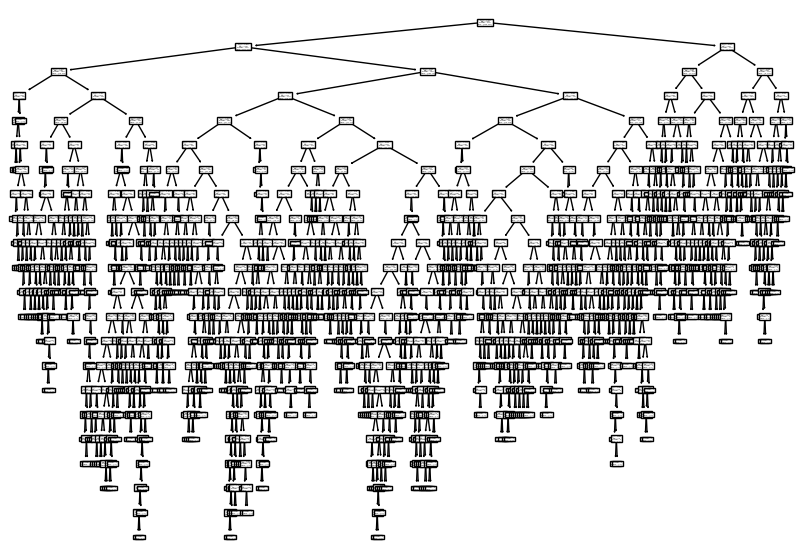

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

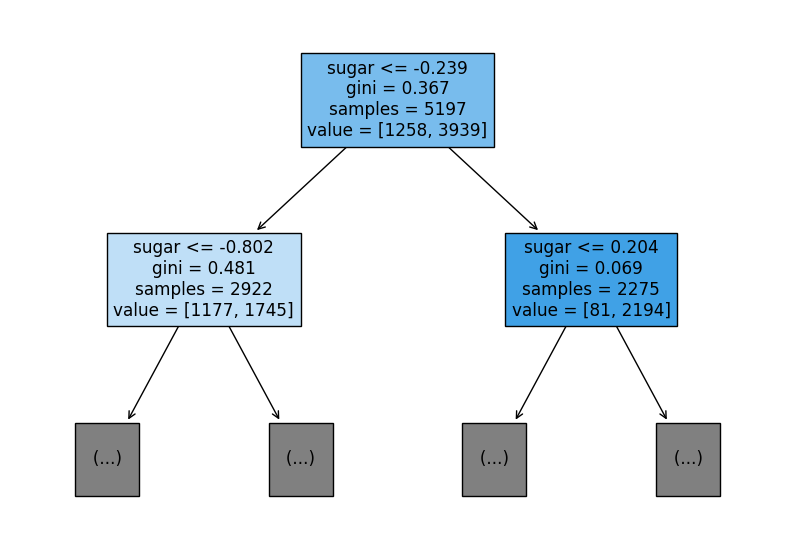

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

루트 노드는 당도가 -0.239 인지 질문을 한다. 만약 어떤 샘플의 당도가 -0.239와 같거나 작으면 왼쪽 가지로 간다. 그렇지 않으면 왼쪽 가지로 간다.

즉 왼쪽이 True, 우측이 False 이다.
총 5197 개의 데이터 중 음성 클래스(레드와인)는 1258 개이고, 양성클래스는 3939개이다.

당도가 -0.802 와 같거나 낮다면 다시 왼쪽 가지로, 그렇지 않다면 오른쪽 가지로 이동한다.

이 노드에서 음성 클래스와 양성 클래스의 샘플 개수는 각각 1177 개와 1745개이다. 루트 노드보다 양성 클래스, 즉 화이트 와인의 바율이 크게 줄어들었다.

오른쪽 노드는 음성 클래스가 81개, 양성 클래스가 2194개로 대부분의 화이트 와인 샘플이 이 노드로 이동했다.

plot_tree() 함수에서 filled = True 로 지정하면 클래스마다 색을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.


In [17]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


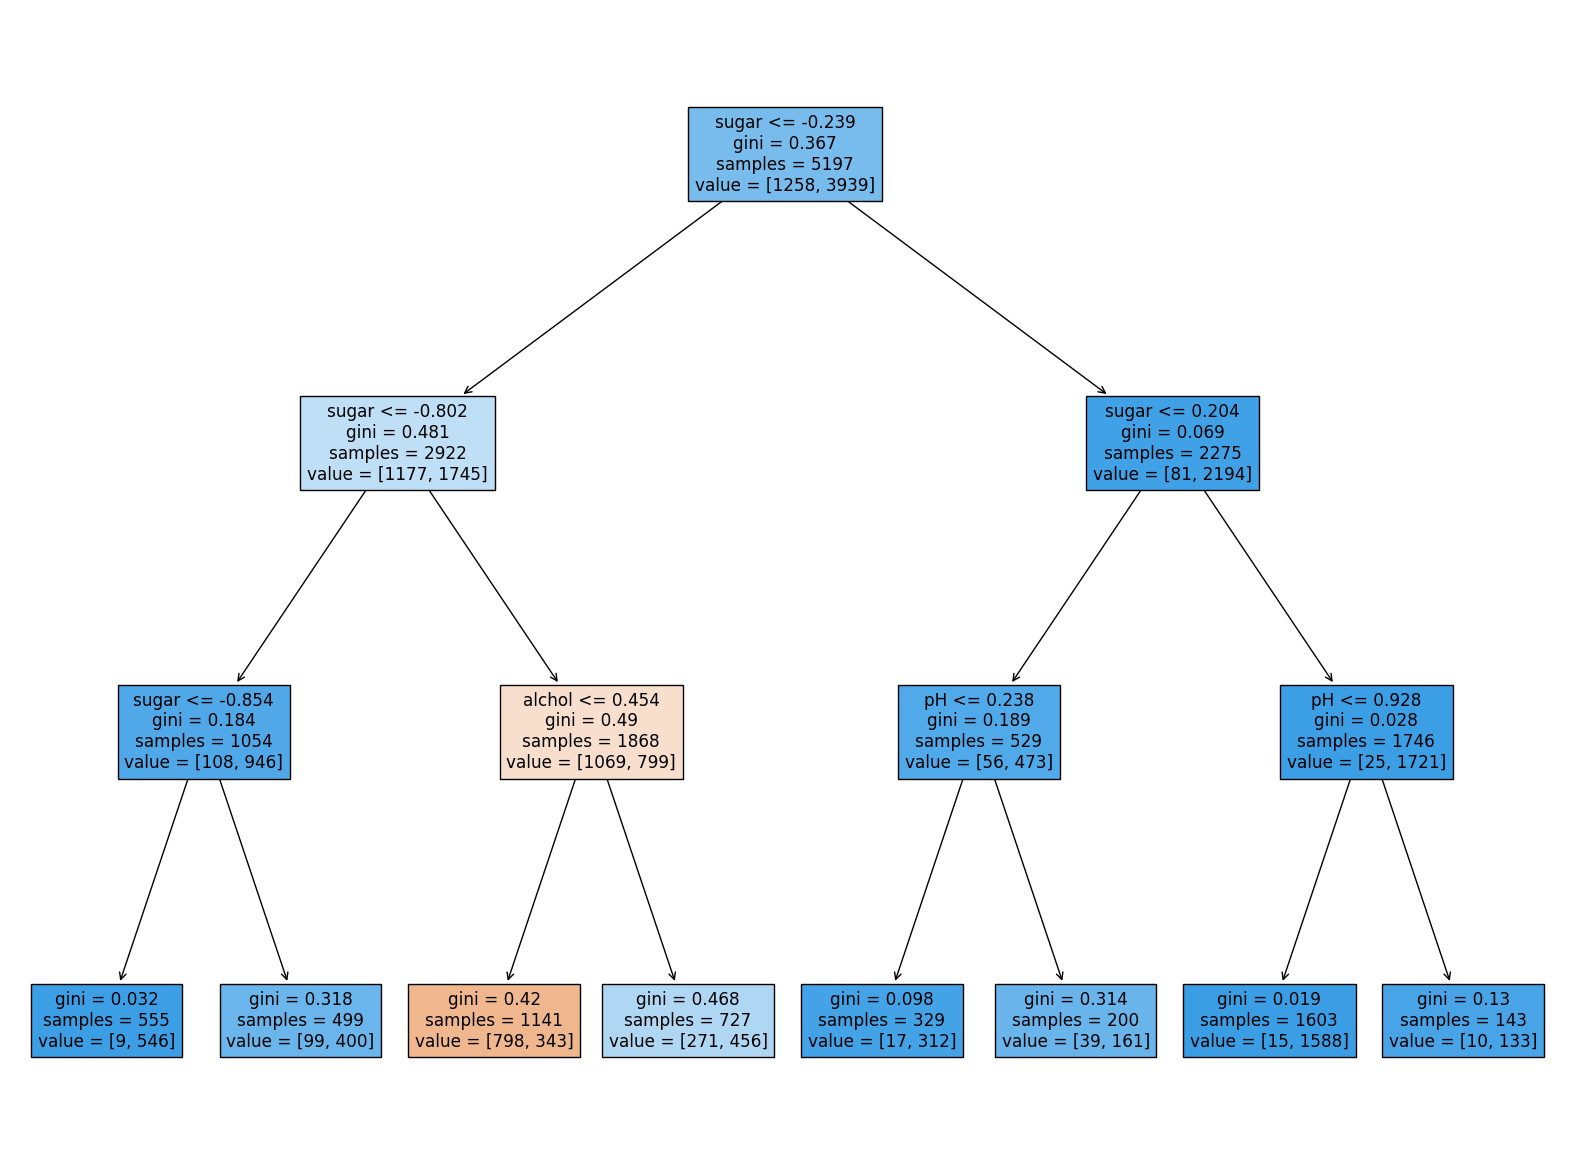

In [18]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol','sugar','pH'])
plt.show()

In [20]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
